In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../plotMithraPy')
import plotMiFuncs as pmf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
from datetime import date
import numpy as np
import pandas as pd
import os
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

raw_data = []

###########################################################################################
###########################################################################################
# Instantiate basic stuff
fs = 14
footnote = 'Albà, ' + str(date.today())
for_report = False
pltpath = 'tests/plots'

raw_data.append( ['tests/beam_43MeV_340mum_50mod', 'E = 43MeV, $\sigma_x = 340\mu m$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_43MeV_340mum_75mod', 'E = 43MeV, $\sigma_x = 340\mu m$,\n Q = .3 nC, density = 75 %' ] )
raw_data.append( ['tests/beam_43MeV_340mum_99mod', 'E = 43MeV, $\sigma_x = 340\mu m$,\n Q = .3 nC, density = 99 %' ] )
raw_data.append( ['tests/beam_43MeV_681mum_50mod', 'E = 43MeV, $\sigma_x = 681\mu m$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_43MeV_681mum_75mod', 'E = 43MeV, $\sigma_x = 681\mu m$,\n Q = .3 nC, density = 75 %' ] )
raw_data.append( ['tests/beam_43MeV_681mum_99mod', 'E = 43MeV, $\sigma_x = 681\mu m$,\n Q = .3 nC, density = 99 %' ] )
raw_data.append( ['tests/beam_43MeV_1mm_50mod', 'E = 43MeV, $\sigma_x = 1 mm$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_43MeV_1mm_75mod', 'E = 43MeV, $\sigma_x = 1 mm$,\n Q = .3 nC, density = 75 %' ] )
raw_data.append( ['tests/beam_43MeV_1mm_99mod', 'E = 43MeV, $\sigma_x = 1 mm$,\n Q = .3 nC, density = 99 %' ] )
raw_data.append( ['tests/beam_noWiggler_43MeV_340mum_50mod', 'no Wiggler,\n E = 43MeV, $\sigma_x = 340\mu m$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_noWiggler_43MeV_681mum_50mod', 'no Wiggler,\n E = 43MeV, $\sigma_x = 681\mu m$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_noWiggler_43MeV_1mm_50mod', 'no Wiggler,\n E = 43MeV, $\sigma_x = 1mm$,\n Q = .3 nC, density = 50 %' ] )
raw_data.append( ['tests/beam_noWiggler_5577KeV_1mm_50mod', 'no Wiggler,\n E = 5.57MeV, $\sigma_x = 1m$,\n Q = .3 nC, density = 50 %' ] )
# raw_data.append( ['tests/nonEmitted_beam_43MeV_681mum_50mod', 'nonEmitted,\n E = 43MeV, $\sigma_x = 681\mu m$,\n Q = .3 nC, density = 50 %' ] )
# raw_data.append( ['tests/test_condition=pencil_noWiggler', 'no wiggler, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pencil_noSC', 'no SC, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pencil_increasedRes', 'increase res,\n $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pencil', 'Last week example\n E = 50 MeV, $\sigma_x$ = .1 mm,\n Q = 1 nC, density = 87 %\n FWHM = 1 ps, $\lambda$ = 2 ps' ] )
# raw_data.append( ['tests/test_condition=radiation_noWiggler', 'no wiggler, $\sigma_x$ = 2.5 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=radiation', '$\sigma_x$ = 2.5 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pancake_noWiggler', 'no wiggler, $\sigma_x$ = 8 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pancake_noSC', 'no SC, $\sigma_x$ = 8 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )
# raw_data.append( ['tests/test_condition=pancake', '$\sigma_x$ = 8 mm , N = 1e6, E = 50 MeV, Q = 1 nC' ] )

###########################################################################################
###########################################################################################

leg = []
fnames = []
for i in raw_data:
    fnames.append( i[0])
    leg.append( i[1] )

print(footnote)
# Create folder for plots if it doesn't exist
if not os.path.exists(pltpath):
    os.mkdir(pltpath)
    print("Created folder " + pltpath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Albà, 2020-04-28


# Statistics

In [3]:
stats = []
     
for i, fname in enumerate(fnames):
    print(i)
    stats.append( pmf.importStat( fname + '/bunch-sampling/bunch.txt', show = True) )


0


tests/beam_43MeV_340mum_50mod/bunch-sampling/bunch.txt
1
tests/beam_43MeV_340mum_75mod/bunch-sampling/bunch.txt
2
tests/beam_43MeV_340mum_99mod/bunch-sampling/bunch.txt
3
tests/beam_43MeV_681mum_50mod/bunch-sampling/bunch.txt
4
tests/beam_43MeV_681mum_75mod/bunch-sampling/bunch.txt
5
tests/beam_43MeV_681mum_99mod/bunch-sampling/bunch.txt
6
tests/beam_43MeV_1mm_50mod/bunch-sampling/bunch.txt
7
tests/beam_43MeV_1mm_75mod/bunch-sampling/bunch.txt
8
tests/beam_43MeV_1mm_99mod/bunch-sampling/bunch.txt
9


tests/beam_noWiggler_43MeV_340mum_50mod/bunch-sampling/bunch.txt
10
tests/beam_noWiggler_43MeV_681mum_50mod/bunch-sampling/bunch.txt
11
tests/beam_noWiggler_43MeV_1mm_50mod/bunch-sampling/bunch.txt
12
tests/beam_noWiggler_5577KeV_1mm_50mod/bunch-sampling/bunch.txt


Mesh limits z -0.010920000000000001 0.010920000000000001
Mesh limits x -0.0025 0.0025
Mesh limits y -0.0075 0.0075


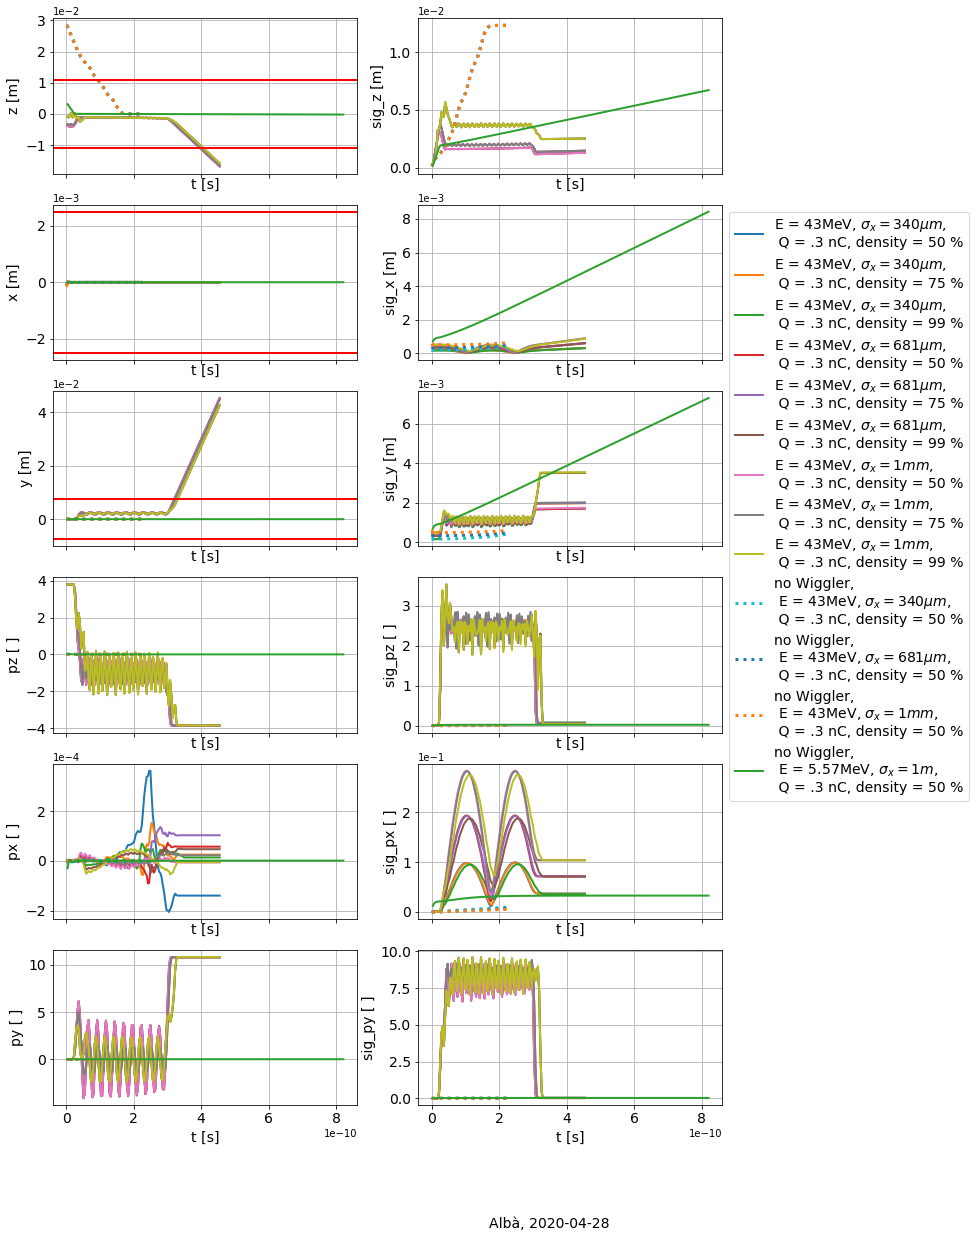

In [6]:
names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
Ls = [5e-3, 15e-3, 2e-3]  # Mesh lengths
Ls[2] *= 10.92  # * gamma_
dotted = [9,10,11]  # Indexes from fnames to plot with dotted lines
notPlot = []  # Indexes from fnames not to plot
legLocal = []
for i, ax in enumerate(axs.reshape(-1)):
    ax.grid()
    for j, stat in enumerate(stats):
        if j in notPlot:
            continue
        if j in dotted:
            ls = ':'
            lw = 3
        else:
            ls = '-'
            lw = 2
        pmf.plotStat(ax, stat, quants = ['t',names[i]], factors = [1, 1], lw = lw, ls = ls )
        legLocal.append(leg[j])
        # if int(i/10) == 0:
        #     ax.set_xlabel('')
        axs[1,1].legend(legLocal, fontsize = fs, bbox_to_anchor = [1., 1.])
# Draw mesh limits
xyz = ['x', 'y', 'z']
for j in range(3):
    i  = (2 + j) % 3
    print('Mesh limits', xyz[i], -.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])  # Mesh limits as plot limits
if not for_report:
    fig.text(.7, .04, footnote, fontsize = fs, ha='center')
plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()


In [3]:
# Screen data
r_data = raw_data[5]
[data, screens] = pmf.importScreen( r_data[0] + '/bunch-screen/bunch-p#-screen#.txt', show = True )

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  4 , number of processors =  44
0 tests/beam_43MeV_681mum_99mod/bunch-screen/bunch-p#-screen0.txt


1 tests/beam_43MeV_681mum_99mod/bunch-screen/bunch-p#-screen1.txt


2 tests/beam_43MeV_681mum_99mod/bunch-screen/bunch-p#-screen2.txt


3 tests/beam_43MeV_681mum_99mod/bunch-screen/bunch-p#-screen3.txt


Screens at  [-0.12, 0.2, 0.6, 0.95]


Npart =  1000000


Npart =  1000000


Npart =  1000000


Npart =  1000000


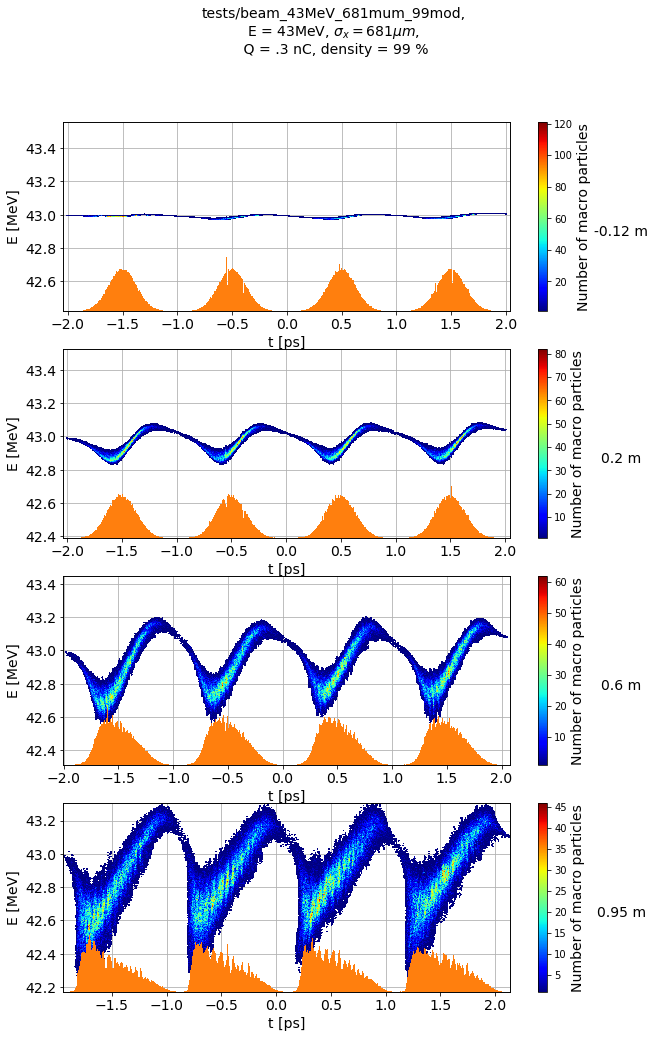

In [4]:
# Plot all screens for one folder
def plotThing(ax):
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = i, type = 'hist2d-hist',
                            factors = [-1e12,1e-6], limx = [], nbins = 700, color = 1)
    ax.text( 1.25, .4, str(screens[i]) + ' m', transform=ax.transAxes, fontsize = fs, ha='center' )
    ax.grid()
    print('Npart = ', len(x))
    # ax.set_xlim(left = 0.5, right = 0.8)
    # ax.set_ylim(bottom = -1e-1, top = 1e-1)
fig, ax = plt.subplots( len(screens), 1, figsize = ( 10, 4*len(screens) ), sharey = False, sharex = False )
if len(screens) > 1:
    ax = ax.reshape(-1)
    for i in range(len(screens)):
        plotThing(ax[i])
    pmf.adjust_axes_limits( ax, 'x' )
    pmf.adjust_axes_limits( ax, 'y' )
else:
    plotThing(ax)
fig.suptitle(r_data[0] + ',\n' + r_data[1], fontsize = fs)
plt.savefig( (pltpath + '/hist2d-hist-43MeV_681mum_99mod.png'), bbox_inches='tight' )    
plt.show()


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/beam_43MeV_1mm_50mod/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.95]


E =  42.828886081001336
columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  8
1 tests/beam_noWiggler_43MeV_1mm_50mod/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.95]


E =  42.9708844194297
Saving...


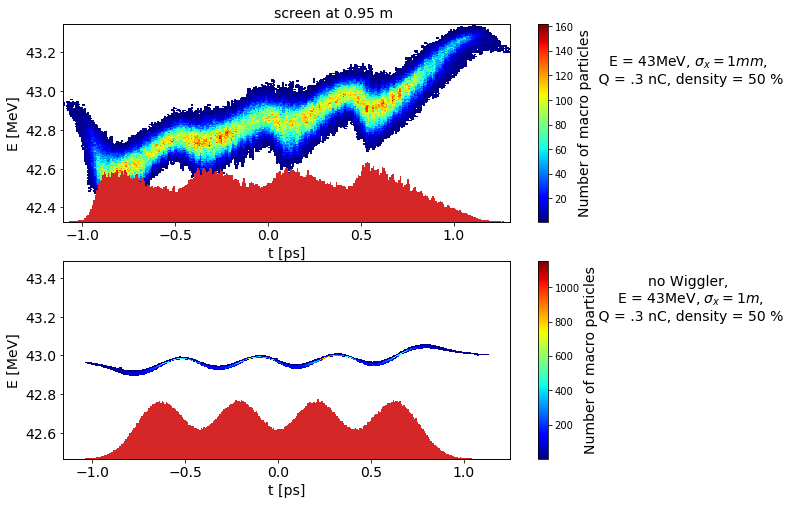

In [15]:
# Plot one screen for several examples
screen_to_plot = -1  # Index of screen to plot
examples = [6,11]  # Indexes of fnames to plot

fig, ax = plt.subplots( len(examples), 1, figsize = ( 10, 4*len(examples) )) 
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-screen/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax[i], data, ['t', 'E'], screenNum = screen_to_plot, type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 300, color = 4)
    print('E = ', np.mean(y))
    ax[i].text( 1.4, .7, raw_data[ex][1], transform=ax[i].transAxes, fontsize = fs, ha='center' )

pmf.adjust_axes_limits( ax, 'x' )
pmf.adjust_axes_limits( ax, 'y' )
fig.suptitle('screen at ' + str(screens[0]) + ' m', fontsize = fs, y = .91)
print('Saving...')
# plt.savefig( (pltpath + '/hist_50mod.png'), bbox_inches='tight' )    
plt.show()

columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/beam_43MeV_340mum_99mod/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.95]


mean E =  42.8400020743858
dE =  1.5175373737309101
columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  4 , number of processors =  44
3 tests/beam_43MeV_681mum_99mod/bunch-screen/bunch-p#-screen3.txt


Screens at  [0.95]


mean E =  42.810345035677095
dE =  1.1354964645214025
columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  44
1 tests/beam_43MeV_1mm_99mod/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.95]


mean E =  42.85987450597457
dE =  0.769122818536502


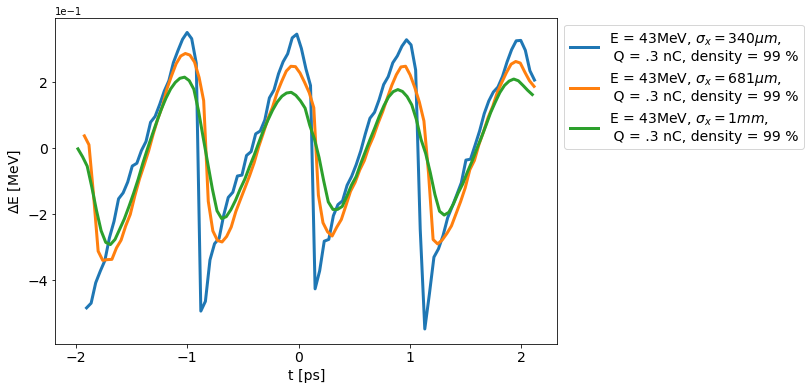

In [45]:
# Plot one screen for several examples, ALL IN ONE SAME FIGURE
screen_to_plot = -1  # Index of screen to plot
examples = [2,5,8]  # Indexes of fnames to plot

fig, ax = plt.subplots( figsize = ( 9, 6) ) 
for i, ex in enumerate(examples):
    # if i == len(examples) - 1:
    #     ls = '--'
    # else:
    ls = '-'
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-screen/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 100, color = i, ls = ls, lw = 3)
    print('mean E = ', np.mean(y))
    print('dE = ', np.max(y[10:-10]) - np.min(y[10:-10]))
ax.legend( [raw_data[i][1] for i in examples], fontsize = fs, bbox_to_anchor = [1.,1.]) 
#fig.suptitle('no wiggler, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC', fontsize = fs)
plt.savefig( (pltpath + '/mod_compare_99.png'), bbox_inches='tight' )    
plt.show()


columns =  ['q', 'x', 'y', 't', 'px', 'py', 'pz']
Number of screens =  2 , number of processors =  16
1 tests/test_condition=pencil_noWiggler/bunch-screen/bunch-p#-screen1.txt


Screens at  [0.88]


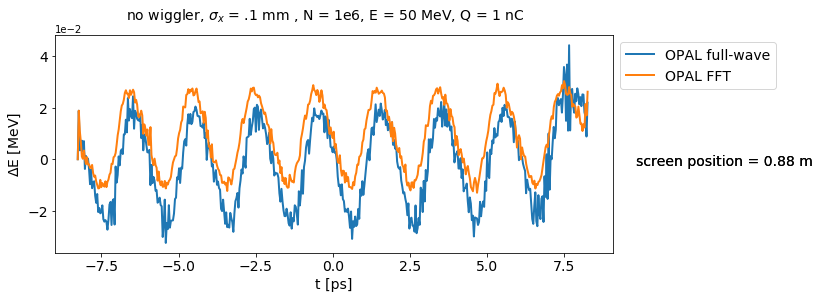

In [20]:
# Plot comparison with the OPAL FFT solver
screen_to_plot = 1  # Index of screen to plot
examples = [0,1,2,3,4,5]  # Indexes of fnames to plot
examples = [0]

fig, ax = plt.subplots( figsize = ( 10, 4) ) 
for i, ex in enumerate(examples):
    [data, screens] = pmf.importScreen( raw_data[ex][0] + '/bunch-screen/bunch-p#-screen#.txt', index_screens = [screen_to_plot], show = True )
    [x,y] = pmf.plotScreen( ax, data, ['t', 'E'], screenNum = screen_to_plot, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)

# Now plot the profile imported from OPAL
df = pd.read_csv('opalScreen2', sep='\t', header = None, index_col = False, names = ['t', 'E'])
df['E'] = df['E'].apply(lambda x: x*1e6)
[x,y] = pmf.plotScreen( ax, df, ['t', 'E'], screenNum = 0.88, type = 'mod', factors = [-1e12,1e-6], nbins = 500, color = i)
ax.legend( ['OPAL full-wave', 'OPAL FFT'], fontsize = fs, bbox_to_anchor = [1.,1.])
ax.set_xlim(left = -9)
fig.suptitle('no wiggler, $\sigma_x$ = .1 mm , N = 1e6, E = 50 MeV, Q = 1 nC', fontsize = fs)
plt.savefig( (pltpath + '/bench_mark.png'), bbox_inches='tight' )    
plt.show()

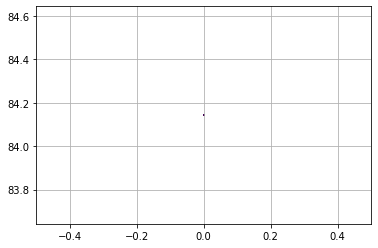

In [26]:
# plot initial input distro .csv
init = pd.read_csv('tests/beam_43MeV_340mum_50mod/data/und_DIST.dat', delim_whitespace = True,
                   skiprows = 2, names = ['x', 'px', 'y', 'py', 'z', 'pz'] )
plt.hist2d(init['px'], init['pz'], bins = 500, cmin = 1)
# plt.hist(init['z'], bins = 500)
plt.grid()
plt.show()

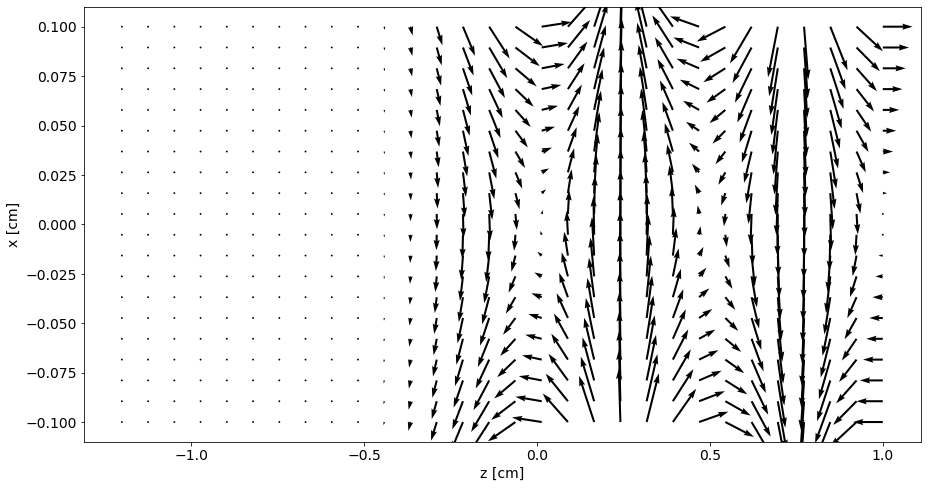

In [118]:
# Visualize magnetic field
Nz = 30
Nx = 20
z = np.linspace(-1.2, 1., Nz)
x = np.linspace(-.1, .1, Nx)
lu = 1.
B0 = 1.365
Bx, Bz = np.meshgrid(z,x)
ku = 2 * np.pi / lu
for i, xi in enumerate(x):
    for j, zj in enumerate(z):
        if zj >= 0:
            Bx[i,j] = B0 * np.cosh(ku * xi) * np.sin(ku * zj)
            Bz[i,j] = B0 * np.sinh(ku * xi) * np.cos(ku * zj)
        else:
            Bx[i,j] = B0 * np.cosh(ku * xi) * ku * zj * np.exp(-ku**2 * zj**2 / 2)
            Bz[i,j] = B0 * np.sinh(ku * xi) * np.exp(-ku**2 * zj**2 / 2)

fig, ax = plt.subplots(figsize = (15,8))
q = ax.quiver(z, x, Bz, Bx)
ax.set_xlabel('z [cm]', fontsize = fs)
ax.set_ylabel('x [cm]', fontsize = fs)
ax.tick_params( axis = 'both', labelsize = fs )
# ax.text( 1.1, .7, 'Wiggler field \n $B_x = B_0cosh(kx)sin(kz)$ \n'
#          + '$B_z = B_0sinh(kx)cos(kz)$', transform=ax.transAxes, fontsize = fs, ha='center' )
# plt.savefig( (pltpath + '/B_field.png'), bbox_inches='tight' )    
plt.show()
        

Using B0 =  1.3478491580020582


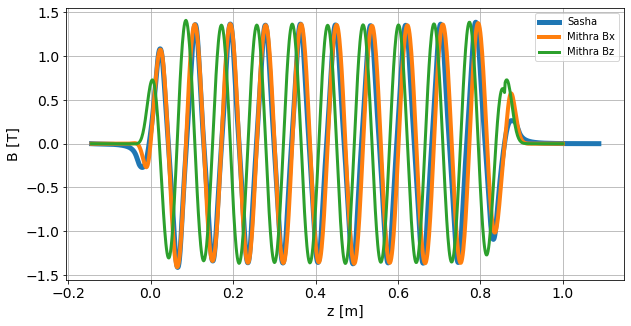

In [109]:
# Plot z-field    
# Fieldmap from Sasha
field = pd.read_csv('~/documents/ETHZ/Semester_Project_Master_Thesis/awa_masters/fieldmaps/short_wiggler_period_8_5cm_gap_14_5mm.txt',
                    skiprows = 1, delim_whitespace = True, names = ['pos', 'B'])
zSasha = np.insert(np.array(field['pos']), 0, 0.0) * 1e-3
BSasha = np.insert(np.array(field['B']), 0, 0.0)
start = .143
zSasha -= start

# Interpolate amplitude
ind,_ = find_peaks(np.abs(BSasha))
zInt = np.insert(zSasha[ind], 0, -start)
BInt = np.insert(np.abs(BSasha)[ind], 0, 0.0)
BInt = interp1d(zInt, BInt, kind = 'cubic')

# Values for Mithra field
PI = 3.1415926535
lu = .0859
ku = 2 * PI / lu
Nperiods = 10
K = 10.81
EPSILON_ZERO  	= 8.85418782e-12
MU_ZERO        	= 4.0 * PI * 1.0e-7
C0             	= 1.0 / np.sqrt(EPSILON_ZERO * MU_ZERO)
EM = 9.109e-31
EC = 1.602e-19
B0 = EM * C0 * 2 * PI / lu * K / EC
print('Using B0 = ', B0)
z = np.linspace(-start,1.0,800)
dz = z[1] - z[0]
BMx = []  # Mithra
BMz = []  # Mithra
for i,lz in enumerate(z):
    # BMx.append(BInt(lz))
    # if i == 0:
    #     BMz.append(0.0)
    # else:
    #     BMz.append(1 / (dz * ku) * (BMx[i] - BMx[i-1]))
    
    if lz >= 0.0 and lz < lu * Nperiods:
        BMx.append(BInt(lz) * np.sin(ku * lz))
        BMz.append(BInt(lz) * np.cos(ku * lz))
    elif lz < 0.0:
        BMx.append(BInt(lz) * ku * lz * np.exp(-(ku * lz)** 2 / 2.0))
        BMz.append(BInt(lz) * np.exp(-(ku * lz)** 2 / 2.0))
    elif lz >= lu * Nperiods:
        lz -= lu * Nperiods
        BMx.append(BInt(lz) * ku * lz * np.exp(-(ku * lz)** 2 / 2.0))
        BMz.append(BInt(lz) * np.exp(-(ku * lz)** 2 / 2.0))
    
    # if lz >= 0.0 and lz <= lu * Nperiods:
    #     BMx.append(B0 * np.sin(ku * lz))
    #     BMz.append(B0 * np.cos(ku * lz))
    # elif lz < 0.0:
    #     BMx.append(B0 * ku * lz * np.exp(-(ku * lz)** 2 / 2.0))
    #     BMz.append(B0 * np.exp(-(ku * lz)** 2 / 2.0))
    # elif lz > lu * Nperiods:
    #     lz -= lu * Nperiods
    #     BMx.append(B0 * ku * lz * np.exp(-(ku * lz)** 2 / 2.0))
    #     BMz.append(B0 * np.exp(-(ku * lz)** 2 / 2.0))

# Plot
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(zSasha, BSasha, lw = 5)
ax.plot(z, BMx, lw = 4, ls = '-')
ax.plot(z, BMz, lw = 3)
# ax.scatter(z, BInt(z), color = 'r', marker = '.')
ax.set_xlabel('z [m]', fontsize = fs)
ax.set_ylabel('B [T]', fontsize = fs)
ax.grid()
ax.tick_params( axis = 'both', labelsize = fs )
ax.legend(['Sasha', 'Mithra Bx', 'Mithra Bz'])
plt.savefig( (pltpath + '/B_field_comp.png'), bbox_inches='tight' )    
plt.show()


Nz =  20 , Nx =  101
dz =  2.0 , dx =  0.0725
(Nx, Nz ) =  (101, 20)


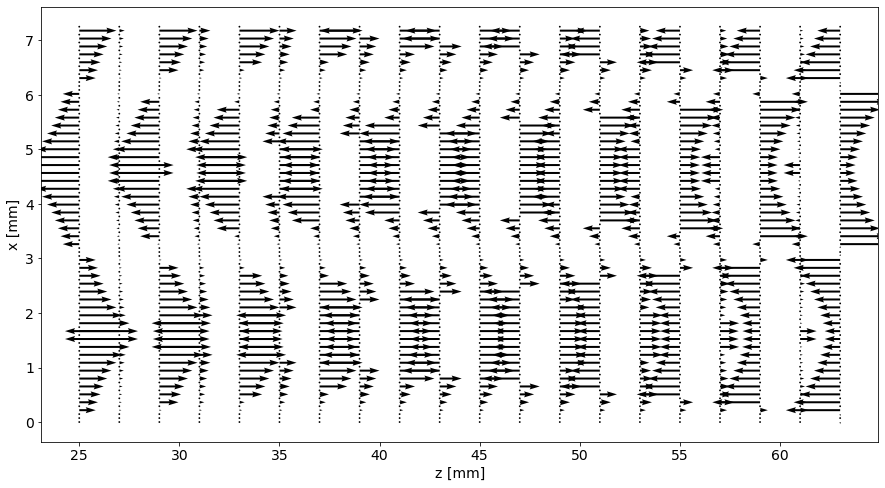

In [155]:
# Compute whole field for Sasha
field = pd.read_csv('~/documents/ETHZ/Semester_Project_Master_Thesis/awa_masters/fieldmaps/short_wiggler_period_8_5cm_gap_14_5mm.txt',
                    skiprows = 1, delim_whitespace = True, names = ['pos', 'B'])
z = np.array(field['pos'])[100:300:10]  # in mm
dz = z[1] - z[0]
Nz = z.size
Nx = 100
if Nx%2 != 1:
    Nx += 1
L = 14.5
x = np.linspace(0.0, L/2, Nx)
dx = x[1] - x[0]
print('Nz = ', z.size, ', Nx = ', x.size)
print('dz = ', dz, ', dx = ', dx)
Bx = np.zeros([len(x), len(z)])
Bz = np.zeros([len(x), len(z)])
print('(Nx, Nz ) = ', Bx.shape)

# Function zero div, or curl, with di/j inversed and -di
def zeroDiv(Bi0, di, Bjm,  dj):
    Nz = len(Bi0)
    Bi0 = np.array(Bi0)
    Bi0 = np.insert(Bi0, 0, 0.0)
    Bi0 = np.append(Bi0, 0.0)
    Bjm = np.array(Bjm)
    Bjp = np.zeros(len(Bjm))
    for i in range(Nz):
        Bjp[i] = Bjm[i] - dj / di * (Bi0[i+2] - Bi0[i])    
    return Bjp

# Function interp
def interp(B, dx, known_borders = 1, txt = ''):
    N = len(B)
    kb = known_borders
    if kb == 0:
        kb += 1
    for i in range(kb, N - kb):
        if (i - kb)%2 == 0.0:
            # print('Interpolating', txt, 'at line', i)
            B[i] = (B[i+1] + B[i-1]) / 2
    return B

# Step 0: Borders
# print('Computing Bx at line', 0)
Bx[0] = np.array(field['B'])[100:300:10]

# Step 1: Curl = 0 for first line
# print('Computing Bz at line', 1)
Bz[1] = zeroDiv(Bx[0], dz, np.zeros(Nz), -dx / 2)

# Step 2: Div = 0 line by line
for i in range(2,Nx,2):
    # print('Computing Bx at line', i)
    Bx[i] = zeroDiv(Bz[i-1], dz, Bx[i-2], dx)
    if i+1 != Nx:
        # print('Computing Bz at line', i + 1)
        Bz[i+1] = zeroDiv(Bx[i], dx, Bz[i-1], dz)

# Step 3: Interpolate unknown values
# Bx = interp(Bx, dx, known_borders = 1, txt = 'Bx')
# Bz = interp(Bz, dx, known_borders = 2, txt = 'Bz')


fig, ax = plt.subplots(figsize = (15,8))
q = ax.quiver(z, x, Bz, Bx)
ax.set_xlabel('z [mm]', fontsize = fs)
ax.set_ylabel('x [mm]', fontsize = fs)
ax.tick_params( axis = 'both', labelsize = fs )
# plt.savefig( (pltpath + '/B_field.png'), bbox_inches='tight' )    
plt.show()
